In [206]:
pip install -U scikit-surprise


Note: you may need to restart the kernel to use updated packages.


In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from surprise import accuracy, Dataset, SVD,Reader , NormalPredictor, KNNBasic , NMF
from surprise.model_selection import train_test_split, cross_validate , GridSearchCV , KFold

from surprise.pipeline import Pipeline

ModuleNotFoundError: No module named 'surprise.pipeline'

In [66]:
data = pd.read_csv('data/real.csv',index_col=0)
data_as = pd.read_csv('data/Form.csv')

In [67]:
'''
    
    change user and store to idx2user or idx2item

'''

user2idx = {user: idx for idx, user in enumerate(data.User.unique())}
idx2user = {idx: user for user, idx in user2idx.items()}

item2idx = {item: idx for idx, item in enumerate(data.Store.unique())}
idx2item = {idx: item for item, idx in item2idx.items()}

In [68]:
'''

    create experimental range score

'''
reader = Reader(rating_scale=(1, 5))

In [69]:
test = data.copy()
test['User'] = test['User'].map(user2idx)
test['Store'] = test['Store'].map(item2idx)

In [202]:
dataset = Dataset.load_from_df(test[['User','Store','Rating']],reader)
trainset, testset = train_test_split(dataset, test_size=0.20)

In [203]:
sim_options = {
    "k": 15,
    "name": "cosine",
    "user_based": True,  # compute  similarities between items
}


knnbasic = KNNBasic(sim_options=sim_options,verbose=False)
svd = SVD(n_epochs=10,n_factors=20)
nmf = NMF(n_epochs=10,n_factors=20)

setup = {
    'KNN_BASIC':knnbasic,
    'SVD':svd,
    'NMF':nmf
}

hist = []

def train_(algo):
    for name,model in setup.items():
        print(name,end='\n')
        model.fit(trainset)
        predictions = model.test(testset)
        hist.append({
            f'{name}':{
                "RMSE" :accuracy.rmse(predictions),
                "MAE" :accuracy.mae(predictions),
                "MSE" :accuracy.mse(predictions)
            }
        
        
        })
        
        
train_(setup)

KNN_BASIC
RMSE: 0.7901
MAE:  0.6358
MSE: 0.6242
SVD
RMSE: 0.7698
MAE:  0.6047
MSE: 0.5927
NMF
RMSE: 0.8040
MAE:  0.5867
MSE: 0.6464


In [188]:
data.pivot_table(index='User',columns='Store',values='Rating')

Store,11.11 Gallery and Coffee,Abe Specialty Coffee,Amarna,Anna Roasters,Attaroast,BaanHuakham Cafe & Farmstay,BalconyKiss Coffee,Blendstorm Coffee Roasters,Blues Coffee,Bossa cafe,...,ROSIEHOLM,Rogue Roasters,Saereesook,Snoopcat Cafe,SongSarn,Stufe coffee,Tree Cafe Rim Moon,Yuanjai Cafe,r o u n d,sangob
User,,,,,,,,,,,,,,,,,,,,,
01 มติมนต์ จํานงค์,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
113_kammika raksa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904x,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984whatthehell,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212ปาณิตตา ศิริชัย,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
蔡賢德Karanpon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
김주일,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
남궁진영,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
trainset = dataset.build_full_trainset()

# Choose an algorithm
algo = SVD(n_epochs=10,n_factors=20,lr_all=0.005)

# Train the algorithm
algo.fit(trainset)

# Generate predictions for all user-item pairs
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

# Convert predictions to DataFrame
df = pd.DataFrame(predictions, columns=['user', 'item', 'actual_rating', 'predicted_rating', 'details'])
df['item'] = df['item'].map(idx2item)
df['user'] = df['user'].map(idx2user)
df = df.pivot(index='user', columns='item', values='predicted_rating')
df

item,11.11 Gallery and Coffee,Abe Specialty Coffee,Amarna,Anna Roasters,Attaroast,BaanHuakham Cafe & Farmstay,BalconyKiss Coffee,Blendstorm Coffee Roasters,Blues Coffee,Bossa cafe,...,ROSIEHOLM,Rogue Roasters,Saereesook,Snoopcat Cafe,SongSarn,Stufe coffee,Tree Cafe Rim Moon,Yuanjai Cafe,r o u n d,sangob
user,,,,,,,,,,,,,,,,,,,,,
01 มติมนต์ จํานงค์,4.613483,4.636140,4.750232,4.630070,4.785781,4.771941,4.552356,4.495420,4.251164,4.445036,...,4.626172,4.608842,4.666061,4.779420,4.674206,4.450361,NaN,4.757319,4.567506,4.678394
113_kammika raksa,4.641514,4.662897,4.680594,4.646949,4.813713,4.663280,4.532502,4.453407,4.166301,4.327871,...,4.559348,4.532875,4.649251,4.699488,4.547096,4.465194,4.210285,4.814516,4.635783,4.706867
1904x,NaN,4.608623,4.748549,4.612424,4.793714,4.729441,4.554547,4.481280,4.264052,4.420226,...,4.640970,4.511005,4.633568,4.718224,4.613985,4.467918,4.239223,4.761560,4.535570,4.626168
1984whatthehell,4.678197,4.637845,4.689900,NaN,4.752754,4.735749,4.512094,4.488118,4.144459,4.455602,...,4.552730,4.621963,4.742183,4.708950,4.626857,4.472794,4.259307,4.812570,4.573133,4.775844
212ปาณิตตา ศิริชัย,4.631580,4.561686,4.670554,4.627868,NaN,4.714666,4.513617,4.456086,4.143383,4.336539,...,4.634329,4.516627,4.566456,4.688467,4.590828,4.434245,4.316638,4.805741,4.586769,4.623408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
蔡賢德Karanpon,4.634851,4.653603,4.742778,4.603483,4.814378,4.749532,4.521601,4.417154,4.273461,4.414731,...,4.626278,4.522507,4.596095,4.746902,4.611398,4.519026,4.295515,4.795586,4.519851,4.681190
김주일,4.550858,4.516186,4.592343,4.463004,4.720987,4.629331,NaN,4.256773,4.146781,4.287505,...,4.537600,4.453596,4.612984,4.616996,4.489797,4.374601,4.258010,4.673421,4.469100,4.607174
남궁진영,4.606169,4.625269,4.711919,4.594528,4.765987,4.676990,4.589884,4.470058,4.192362,4.370483,...,4.681801,4.495438,4.735507,4.799459,4.612605,4.484543,4.306150,4.797420,4.532540,4.685513


In [236]:
df.loc['蔡賢德Karanpon'].sort_values(ascending=False).head(10)

item
Attaroast                      4.814378
Yuanjai Cafe                   4.795586
BaanHuakham Cafe & Farmstay    4.749532
Snoopcat Cafe                  4.746902
Amarna                         4.742778
GODFATHER COFFEE               4.691139
sangob                         4.681190
Abe Specialty Coffee           4.653603
REDCOFFEE                      4.653250
11.11 Gallery and Coffee       4.634851
Name: 蔡賢德Karanpon, dtype: float64

In [197]:
# Choose an algorithm
algo = NMF(n_epochs=10,n_factors=10)

# Train the algorithm
algo.fit(trainset)

# Generate predictions for all user-item pairs
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

# Convert predictions to DataFrame
df = pd.DataFrame(predictions, columns=['user', 'item', 'actual_rating', 'predicted_rating', 'details'])
df['item'] = df['item'].map(idx2item)
df['user'] = df['user'].map(idx2user)
df = df.pivot(index='user', columns='item', values='predicted_rating')
df
# df = df.drop('details', axis=1)
# df = df.pivot(index='user', columns='item', values='predicted_rating')

item,11.11 Gallery and Coffee,Abe Specialty Coffee,Amarna,Anna Roasters,Attaroast,BaanHuakham Cafe & Farmstay,BalconyKiss Coffee,Blendstorm Coffee Roasters,Blues Coffee,Bossa cafe,...,ROSIEHOLM,Rogue Roasters,Saereesook,Snoopcat Cafe,SongSarn,Stufe coffee,Tree Cafe Rim Moon,Yuanjai Cafe,r o u n d,sangob
user,,,,,,,,,,,,,,,,,,,,,
01 มติมนต์ จํานงค์,2.912802,3.787902,4.049579,3.968497,4.008226,2.710208,3.013485,3.232091,3.276841,3.267983,...,3.161955,3.073307,3.194209,3.710390,3.323175,3.173337,NaN,3.197789,2.473687,3.392253
113_kammika raksa,2.568562,2.905304,2.997006,2.659536,2.836582,3.133921,2.976251,2.683133,2.555915,2.497142,...,3.023521,3.223472,2.927061,2.816873,2.330428,2.758319,3.231785,3.351739,2.575176,3.582707
1904x,NaN,2.972597,3.706432,3.297286,3.635748,2.606894,3.326293,3.262400,3.319137,3.976067,...,2.994987,3.373266,3.453899,3.799188,3.523367,3.581320,3.525715,3.094461,2.699672,3.905200
1984whatthehell,3.295593,3.422558,3.603087,NaN,3.662019,3.018634,3.456174,3.215335,2.719201,3.538742,...,3.477493,3.147777,3.560579,3.391399,3.425208,3.033186,3.325595,3.119153,3.502977,3.008471
212ปาณิตตา ศิริชัย,2.787109,3.057020,3.379378,3.429217,NaN,2.790929,2.907708,2.874258,3.270252,2.555506,...,2.792847,3.056871,2.813430,3.365584,2.944774,2.634836,3.268755,3.021992,2.307106,3.071104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
蔡賢德Karanpon,2.731319,3.516771,3.499827,3.229521,3.451521,2.886216,3.079251,3.002809,2.286375,3.075452,...,3.430239,2.911413,3.311416,2.990531,2.938254,2.784116,3.211325,3.161231,3.214827,2.997704
김주일,2.000943,1.763405,1.746947,1.709017,1.704010,2.018118,NaN,1.666435,1.541120,1.775529,...,1.884967,1.917388,1.993655,1.742225,1.726054,1.724979,1.908523,1.934476,2.069650,1.782193
남궁진영,2.480671,3.021319,3.055056,2.685805,3.005534,2.460769,2.864221,2.626296,1.672129,3.131610,...,3.300059,2.475953,3.223647,2.561555,2.677764,2.733538,2.859355,2.737630,3.039104,2.835048


In [198]:
# Calculate MSE, MAE, and RMSE
predictions = algo.test(trainset.build_testset())
mse = accuracy.mse(predictions)
mae = accuracy.mae(predictions)
rmse = accuracy.rmse(predictions)

print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)

MSE: 2.0744
MAE:  1.3980
RMSE: 1.4403
MSE: 2.0743639736013995
MAE: 1.3980413785272066
RMSE: 1.4402652441829593


## deep recommendations 

In [50]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.functional as F

In [51]:
def get_device() -> str:
    """
    Returns the device that available for use. 
    Priority:  GPU (CUDA) > M1 (MPS) > CPU
    
    Returns:
        string of device name
    """
    
    if torch.cuda.is_available():
        return "cuda"
    if hasattr(torch.backends, "mps"):
        if torch.backends.mps.is_available() and torch.backends.mps.is_built():
            return "mps"
    return "cpu"

In [52]:
device = get_device()

In [53]:
relu = nn.ReLU()

In [54]:

class VanillaMF(nn.Module):
    """
    An implementation of vanilla matrix factorization model.
    """
    
    def __init__(self, n_users: int, n_items: int, latent_dim: int = 10):
        super().__init__()
        
        self.user_embeddings = nn.Embedding(n_users, latent_dim)
        self.item_embeddings = nn.Embedding(n_items, latent_dim)
        
        self.user_h1 = nn.Linear(latent_dim, latent_dim // 2)
        self.item_h1 = nn.Linear(latent_dim, latent_dim // 2)
        

        
        # self.user_h1_dropout = nn.Dropout(0.25)
        # self.item_h1_dropout = nn.Dropout(0.25)
        
    def forward(self, user_ids: torch.Tensor, item_ids: torch.Tensor) -> torch.Tensor:
        user_emb = self.user_embeddings(user_ids).squeeze(dim=1)  # (batch_size, latent_dim)
        item_emb = self.item_embeddings(item_ids).squeeze(dim=1)  # (batch_size, latent_dim)
        
        user_h1 = self.user_h1(user_emb)
        item_h1 = self.user_h1(item_emb)
        
        
        
        # user_h1 = self.user_h1_dropout(user_h1)
        # item_h1 = self.item_h1_dropout(user_h1)
        
        dot_product = torch.sum(user_h1 * item_h1, dim=1)
        
        # return (user_h1 * item_h1).sum(dim=1)  # (batch_size, )
        # output = relu(dot_product)
        return relu(dot_product)

    def loss_fn(self, preds: torch.Tensor, targets: torch.Tensor) -> torch.Tensor:
        """
        Simple MSE loss as the loss function for the model.
        
        Args:
            preds: predicted scores
            targets: ground truth scores
            
        Returns:
            MSE of the predictions and the ground truth
        """
        
        # return nn.MSELoss()(preds, targets)  # use package to calculate loss
        return ((preds - targets) ** 2).mean()

In [55]:
class RegularizedMF(VanillaMF):
    """
    Regularized matrix factorization model.
    
    References:
        - https://developers.google.com/machine-learning/recommendation/collaborative/matrix
        - https://colab.research.google.com/github/google/eng-edu/blob/main/ml/recommendation-systems/recommendation-systems.ipynb
    """
    
    def __init__(self, 
                 n_users: int, 
                 n_items: int, 
                 latent_dim: int = 10,
                 reg_coef: float = 0.1,
                 gravity_coeff: float = 1.):
        super().__init__(n_users, n_items, latent_dim)
        
        self.reg_coef = reg_coef
        self.gravity_coeff = gravity_coeff
    
    def regularization_loss(self) -> torch.Tensor:
        """
        Calculate the regularization loss.
        
        Returns:
            regularization loss
        """
        
        user_reg_loss = self.user_embeddings.weight.norm(p=2, dim=1).mean()
        item_reg_loss = self.item_embeddings.weight.norm(p=2, dim=1).mean()
        
        return self.reg_coef * (user_reg_loss + item_reg_loss)
    
    def gravity_loss(self) -> torch.Tensor:
        """
        Calculate the gravity loss.
        
        Returns:
            gravity loss
        """
        
        user_emb = self.user_embeddings.weight  # (n_users, latent_dim)
        item_emb = self.item_embeddings.weight  # (n_items, latent_dim)
        
        denominator = (user_emb.shape[0] * item_emb.shape[0]) * ((user_emb.T @ user_emb) * (item_emb.T @ item_emb)).sum()
        
        return self.gravity_coeff * 1 / denominator

    def loss_fn(self, preds: torch.Tensor, targets: torch.Tensor) -> torch.Tensor:
        """
        MSE loss with regularization.
        
        Args:
            preds: predicted scores
            targets: ground truth scores
            
        Returns:
            MSE of the predictions and the ground truth
        """
        
        return super().loss_fn(preds, targets) + self.regularization_loss() + self.gravity_loss()

In [56]:
encoded_df = data.copy()

encoded_df["User"] = encoded_df["User"].map(user2idx)
encoded_df["Store"] = encoded_df["Store"].map(item2idx)

pd.pivot_table(encoded_df, values='Rating', index='User', columns='Store')

Store,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
User,,,,,,,,,,,,,,,,,,,,,
0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,5.0,NaN,5.0,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [58]:
N_EPOCH = 10
BATCH_SIZE = 512
LEARNING_RATE = 0.02
LATENT_DIM = 20

In [59]:
class CustomDataset(Dataset):
    def __init__(self, df):
        self.df = df
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        user_id = self.df.iloc[idx].User
        item_id = self.df.iloc[idx].Store
        rating = self.df.iloc[idx].Rating
        
        return user_id.astype("int"), item_id.astype("int"), rating.astype("float32")

In [60]:
# Train test split
train_df = encoded_df.copy().sample(frac=0.7, random_state=1)
test_df = encoded_df.copy().drop(train_df.index)

# Create dataloader
train_loader = DataLoader(
    CustomDataset(train_df.copy()),
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_loader = DataLoader(
    CustomDataset(test_df.copy()),
    batch_size=test_df.shape[0],
)

In [61]:
model = VanillaMF(
    n_users=2237, 
    n_items=33,
    latent_dim=LATENT_DIM
).to(get_device())

print(model)

VanillaMF(
  (user_embeddings): Embedding(2237, 20)
  (item_embeddings): Embedding(33, 20)
  (user_h1): Linear(in_features=20, out_features=10, bias=True)
  (item_h1): Linear(in_features=20, out_features=10, bias=True)
)


In [62]:
opt = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [63]:
loss_hist = []
eval_loss_hist = []

for epoch in range(0, N_EPOCH):
    for i, (user_ids, item_ids, ratings) in enumerate(train_loader):
        user_ids = user_ids.to(device)
        item_ids = item_ids.to(device)
        ratings = ratings.to(device)
        
        # training
        _ = model.train()
        opt.zero_grad()
        
        pred_scores = model(user_ids, item_ids)
        loss = model.loss_fn(pred_scores, ratings)
        
        loss.backward()
        opt.step()
        
        # evaluation
        _ = model.eval()
        
        with torch.no_grad():
            eval_loss = 0
            for j, (user_ids, item_ids, ratings) in enumerate(test_loader):
                user_ids = user_ids.to(device)
                item_ids = item_ids.to(device)
                ratings = ratings.to(device)
                
                pred_scores = model(user_ids, item_ids)
                eval_loss += model.loss_fn(pred_scores, ratings)
                
            eval_loss /= len(test_loader)
        
        loss_hist.append(loss.item())
        eval_loss_hist.append(eval_loss.item())
        
    if epoch % 1 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item():.4f}, Eval Loss: {eval_loss.item():.4f}")

Epoch: 0, Loss: 14.3824, Eval Loss: 13.6384
Epoch: 1, Loss: 11.3677, Eval Loss: 11.8123
Epoch: 2, Loss: 10.1231, Eval Loss: 9.9486
Epoch: 3, Loss: 5.9378, Eval Loss: 6.9490
Epoch: 4, Loss: 3.1484, Eval Loss: 3.1619
Epoch: 5, Loss: 1.2386, Eval Loss: 1.1130
Epoch: 6, Loss: 0.8569, Eval Loss: 0.8522
Epoch: 7, Loss: 1.0550, Eval Loss: 0.8762
Epoch: 8, Loss: 0.7808, Eval Loss: 0.7500
Epoch: 9, Loss: 0.6010, Eval Loss: 0.6955


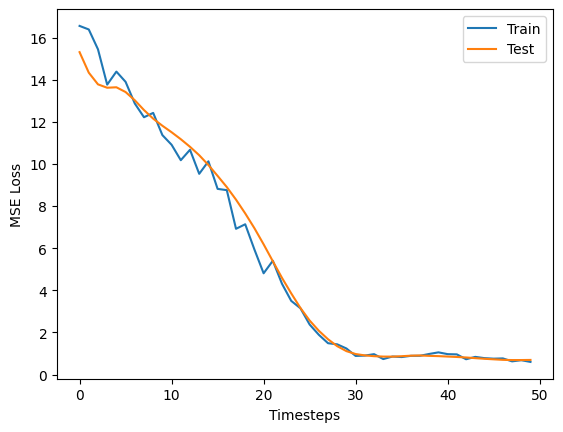

In [64]:
_ = plt.plot(loss_hist, label="Train")
_ = plt.plot(eval_loss_hist, label="Test")
_ = plt.xlabel("Timesteps")
_ = plt.ylabel("MSE Loss")
_ = plt.legend()